In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
# %matplotlib qt

## The backpropagation algorithm is implemented as follows:

In [2]:
""" 
The update equations are mentioned as follows:
1) Weight update from hidden to output layer: W_jh = W_jh - eta * ( S(Z)^T . {(S(Y)-d) * Sd_Y} ) 
2) Weight update from input to hidden layer: W_hi = W_hi - eta * X^T . ({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z) 
3) Bias updates for output layer: bo = bo - eta * sum({(S(Y)-d) * Sd_Y})
4) Bias updates for hidden layer: bh = bh - eta * sum({(S(Y)-d) * Sd_Y} . W_jh^T * Sd_Z )

where, * = elementwise product, . = dot product, ()^T = transpose operation,
eta = learning rate, Z = hidden layer activation potential, S(Z) = hidden layer activation,
Y = output layer activation potential, S(Y) = output layer activation, Sd_Z = derivative of S(Z), 
Sd_Y = derivative of S(Y)
"""

def forward_pass(X, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node):
      
    # hidden layer
    Z = np.dot(X, W_hi) + b_h  # hidden layer activation potential
    S_Z = sigmod_fun(Z)       # hidden layer output
    
    # Output layer
    Y = np.dot(S_Z, W_jh) + b_o  # output layer activation potential
    S_Y = sigmod_fun(Y)          # output layer output
    
    return Z, Y, S_Z, S_Y

def back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node):
    e = 2*(S_Y - d)
    Sd_Y = sigmod_deriv_fun(Y) # Compute the derivative of the S(Y)
    Sd_Z = sigmod_deriv_fun(Z) # Compute the derivative of the S(Z)
    sc_error = e*Sd_Y          # Compute the scaled error   
    
    # output bias update
    b_o = b_o - eta*np.sum(sc_error)
    
    # hidden bias update
    b_h = b_h - eta*np.sum(np.dot(sc_error, W_jh.T)*Sd_Z)    
    
    # weight update input to hidden
    W_hi = W_hi - eta*np.dot(X.T,(np.dot(sc_error, W_jh.T)*Sd_Z))
    
    # weight update hidden to output
    W_jh = W_jh - eta * np.dot(S_Z.T,sc_error) 

    return W_jh, W_hi, b_o, b_h

def sigmod_fun(X):
    return 1/(1+np.exp(-X))

def sigmod_deriv_fun(X):
    X_sig = sigmod_fun(X)
    Z = X_sig*(1-X_sig)
    return Z


## Helper functions:

In [3]:
def add_noise(X, d, num_data = 50):
    num_data = num_data - X.shape[0]
    X_data = X
    d_data = d
    for i in range(num_data):
        X_data = np.append(X_data,X+np.random.uniform(0,0.3, size=(4,1)),axis = 0)
        d_data = np.append(d_data,d,axis = 0)
    arr = np.linspace(start = 0, stop = len(d_data)-1, num = len(d_data), dtype = int)
    np.random.shuffle(arr)
    X_data = X_data[arr, :]
    d_data = d_data[arr]
    return X_data, d_data

def compute_accuracy(S_Y, d_test):
    S_Yt = np.zeros((S_Y.shape[0], S_Y.shape[1]))
    
    for i in range(S_Y.shape[0]):
        if S_Y[i] < 0.5:
            S_Yt[i] = 0
        else:
            S_Yt[i] = 1
    
    err = abs(S_Yt-d_test)
    err = (np.sum(err)/len(d_test))*100
    return err


## Training:

In [4]:
##------------- OR -------------------
X = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([[0],[1],[1],[1]])


# ##------------- AND -------------------
# X = np.array([[0,0],[0,1],[1,0],[1,1]])
# d = np.array([[0],[0],[0],[1]])

# ##------------- XOR -------------------
# X = np.array([[0,0],[0,1],[1,0],[1,1]])
# d = np.array([[0],[1],[1],[0]])

X_data, d_data = add_noise(X, d)
X = X_data[0:int(X_data.shape[0]/2),:]
d = d_data[0:int(X_data.shape[0]/2)]

X_test = X_data[int(X_data.shape[0]/2)+1:X_data.shape[0],:]
d_test = d_data[int(X_data.shape[0]/2)+1:X_data.shape[0]]

epochs = 10000
eta = 0.1
num_in_node, num_hid_node, num_op_node = 2,2,1

# initialize weights and biases
r = math.sqrt(6) / math.sqrt(num_in_node + num_hid_node + 1)
W_hi = np.random.uniform(low = -r, high = r, size = (num_in_node,num_hid_node))
W_jh = np.random.uniform(low = -r, high = r, size = (num_hid_node,num_op_node))
b_h = np.random.uniform(size = (1,num_hid_node))
b_o = np.random.uniform(size = (1,num_op_node))

# Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
# back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node)


error_epoch = np.zeros((epochs,1))
print('training in progress..............')
for i in range(epochs):
    Z, Y, S_Z, S_Y = forward_pass(X, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
    W_jh, W_hi, b_o, b_h = back_propagation(X, d, W_hi, W_jh, Z, S_Z, Y, S_Y, b_h, b_o, eta, num_in_node, num_hid_node, num_op_node)
    error = (0.5*(S_Y - d)*(S_Y - d)).flatten()
    error_epoch[i] = np.sum(error)/len(error)
        
print('training completed ...............')
        


training in progress..............
training completed ...............


## Testing:

testing on data: 
 [[0.02734908 1.02734908]
 [1.2215937  0.2215937 ]
 [1.14845494 0.14845494]
 [0.2659007  1.2659007 ]
 [1.12248637 1.12248637]
 [1.2568232  0.2568232 ]
 [0.09466327 1.09466327]
 [0.05402548 0.05402548]
 [0.00492755 1.00492755]
 [1.25929529 0.25929529]] 

Actual output: 
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]] 

Predicted output: 
 [[0.9961578 ]
 [0.99742859]
 [0.99889353]
 [0.99136826]
 [0.00250889]
 [0.99459015]
 [0.99890122]
 [0.00462584]
 [0.99025501]
 [0.99425194]] 



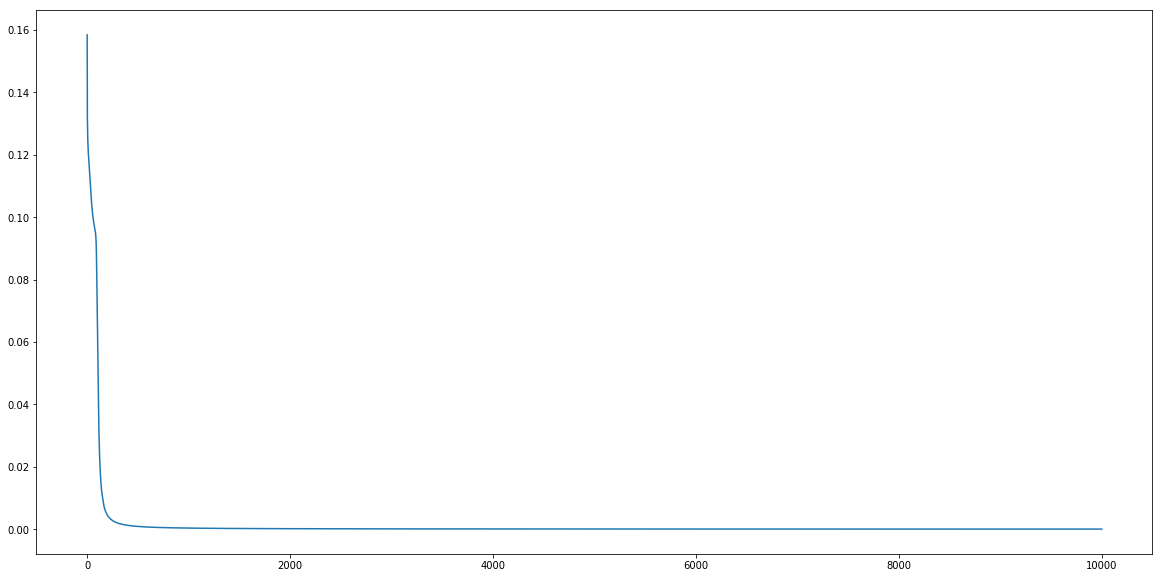

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(error_epoch)
i = 30
j = 40
print('testing on data: \n', X_test[i:j, :], '\n')
print('Actual output: \n', d_test[i:j], '\n')
Z, Y, S_Z, S_Y = forward_pass(X_test[i:j, :], W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
print('Predicted output: \n',S_Y, '\n')

## Compute accuracy:

% error = 0.0
% accuracy = 100.0


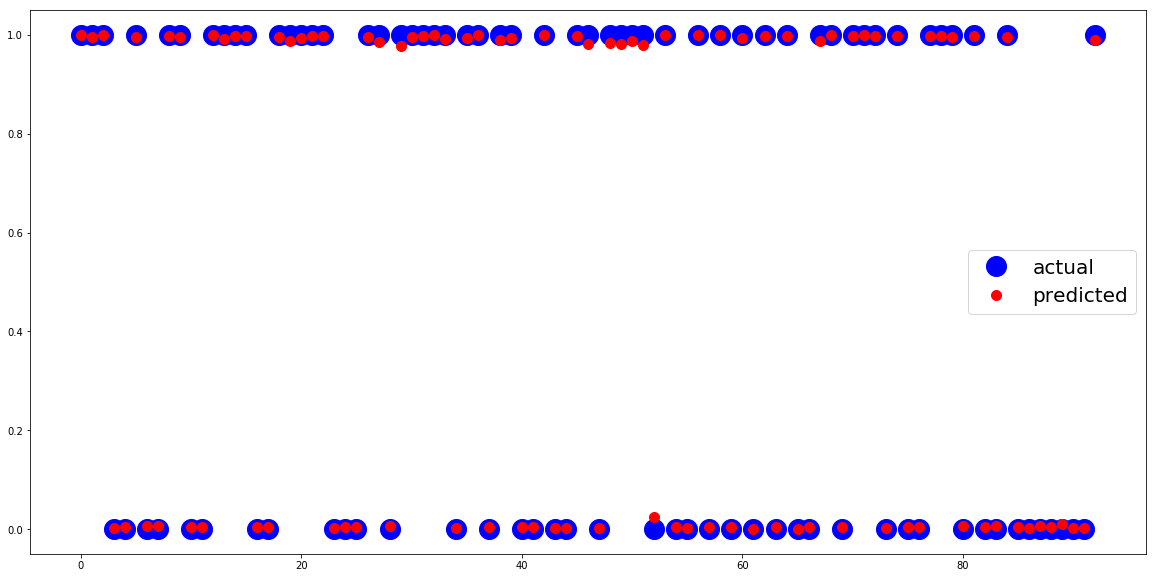

In [6]:
Z, Y, S_Z, S_Y = forward_pass(X_test, W_hi, W_jh, b_h, b_o, num_in_node, num_hid_node, num_op_node)
error = compute_accuracy(S_Y, d_test)
print('% error =', error)
print('% accuracy =', 100-error)

plt.figure(figsize=(20, 10))
plt.plot(d_test, 'b o' , markersize = 20, label = 'actual')
plt.plot(S_Y, 'r.', markersize = 20, label = 'predicted')
plt.legend(fontsize=20)

In [7]:
# plt.plot(X[0:93]-X_test)